Start by copying this into your Google Drive!!

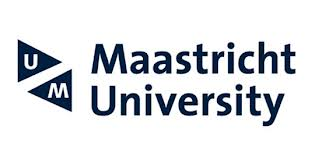
#Faculty of Science and Engineering - Department of Advanced Computer Sciences
# Course Information Retrieval and Text Mining - Tutorial Preprocessing for IRTM

By Jan Scholtes

Version 2024-2025

Welcome to the tutorial on grammar-based NLP. In this notebook you will learn how traditional, grammar-based approaches to deal with syntactic structures, semantics, co-reference & pronoun resolution, and negation handling as discussed in the course Syntax and Semantics.

These methods have been used since the 1970's. In many aspects, they are limited and often also slow. The goal of this tutorial is to let you experience hands-on the challenges in NLP (especially dealing with ambiguity), but also with the limitations of these grammar-based approaches (e.g. not being able to deal with ambiguity, wrong spelling or wrong grammatical use of words or other unexpected situations). This will help you understand why statistical and deep-learning methods are so much better for many of the NLP tasks we discuss in this course.

In this notebook, we will use the Stanford NLTK library.



First, we need to load these libaries, for later use:

In [ ]:
# install requirements
!pip install python-crfsuite
!pip install sklearn-crfsuite

# Load NLTK

In [ ]:
import nltk
nltk.download('punkt_tab')

NLTK comes with many corpora, toy grammars, trained models, etc. A complete list is posted at: https://www.nltk.org/nltk_data/

To install the data, first install NLTK (see https://www.nltk.org/install.html), then use NLTK’s data downloader as described below.

Apart from individual data packages, you can download the entire collection (using “all”), or just the data required for the examples and exercises in the book (using “book”), or just the corpora and no grammars or trained models (using “all-corpora”).

The command below will start the interactive downloader, that also provides you the option to list all modules present in NLTK.

Make sure to quit the interactive download in order to continue!

In [ ]:
nltk.download()

Now let's load most of the most important components we need today:

In [ ]:
nltk.download('book')

# Load Data

In [ ]:
from nltk.book import *

Let's use Moby Dick for now and print the first 1000 chars of the book.

In [ ]:
list_of_text = text1
print(list_of_text[0:1000:1]) # print first 1000 chars

Let's convert this list to a long string as this is what NLTK requires as input and this is what you would normally get form any preprocessing text-extraction process.

In [ ]:
RawTextMobyDick = ""
for x in list_of_text:
  RawTextMobyDick = RawTextMobyDick + " " + x
print(RawTextMobyDick)

# Sentence Detection

Next we recognize sentences.

In [ ]:
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
sentences = tokenizer.tokenize(RawTextMobyDick)
i = 0
for x in sentences:
  print(x)
  i += 1
  if i == 30:   #limit sentences that are printed to 30
    break


# Tokenize

First we tokenize the text. We will leave the punctuation in as we need them later for the linguistic operations we plan to performs.

In [ ]:
words = nltk.tokenize.word_tokenize(RawTextMobyDick)
i = 0
for x in words:
  print(x)
  i += 1
  if i == 50:   #limit words that are printed to 50
    break

# Stemming in NLTK (this is done by using rules)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('tagsets_json')
nltk.download('averaged_perceptron_tagger_eng')

ps = PorterStemmer()

i = 0
for w in words:
    print(w, " : ", ps.stem(w))
    i += 1
    if i == 100:
      break

#Exercise 1:
We immediately observe the limits of stemming.
1. Explain below
2. Why is lemmatization better?
3. Why do we need POS tagging for lemmatization?


YOUR ANSWER HERE

# POS Tagging

In corpus linguistics, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech,based on both its definition and its context. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

Schools commonly teach that there are 9 parts of speech in English: noun, verb, article, adjective, preposition, pronoun, adverb, conjunction, and interjection.

However, there are clearly many more categories and sub-categories. For nouns, the plural, possessive, and singular forms can be distinguished. In many languages words are also marked for their "case" (role as subject, object, etc.), grammatical gender, and so on; while verbs are marked for tense, aspect, and other things. In some tagging systems, different inflections of the same root word will get different parts of speech, resulting in a large number of tags. For example, NN for singular common nouns, NNS for plural common nouns, NP for singular proper nouns. Other tagging systems use a smaller number of tags and ignore fine differences or model them as features somewhat independent from part-of-speech.

In linguistics, a treebank is a parsed text corpus that annotates syntactic or semantic sentence structure. The construction of parsed corpora in the early 1990s revolutionized computational linguistics, which benefitted from large-scale empirical data.

The Penn-Tree Bank is a well known annotated corpus. The Penn Treebank (PTB) project selected 2,499 stories from a three year Wall Street Journal (WSJ) collection of 98,732 stories for syntactic annotation. It contains various syntactic tags, among them Part-of-Speech tags. The Penn-Tree bank is included in NLTK.

The following function can be called to view a list of all possible part-of-speech tags. The extensive list includes PoS tags such as VB (verb in base form), VBD (verb in past tense), VBG (verb as present participle) and so on.

In [ ]:
nltk.help.upenn_tagset()

Now let's try POS tagging on our example text. For this, we can either use a list of sentences or a long lists of words. In our example we will use the list of words.

In [ ]:
from nltk import pos_tag
words_with_pos = nltk.pos_tag(words)
i = 0
for w in words_with_pos:
    print(w)
    i += 1
    if i == 100:
      break

# Better Lemmatization with POS tags

As we discussed last week: Stemming algorithms just remove a suffix or prefix from a word. This results in many non-linguistic words.

Lemmatization takes more linguistic knowledge into consideration and implements a so-called morphological analysis of the words. It returns the "lemma" which is the base form of all its inflectional forms. For this, it needs to know the grammatical role of a word. We can use the Part-of-Speech tag for this.

Please note that the stemming function takes different input than the POS tags output above. E.g. you need to include the syntactic role when you call the function. In this, it only accepts 'v' for all VERB types, 'a' for adjectives, 'n' for all nouns. So you need to capture the above NNP, NNS, and NN and convert them to 'n'when you call the stemming function form NLTK. Try words like "better" and "worse", you will see how they are brought back to their base form.

#Exercise 2:
Now can you write the code below for a better lemmatizer where you use both the original word and the POS tag.

In [ ]:
YOU CODE HERE

What do observe compared with Stemming?

We can also write some code to extract all Noun Phrases

In [ ]:
from nltk import pos_tag

sentence = str(sentences[4]) # we will take one sentence from the list of sentences

print(sentence)
sentence_words = nltk.tokenize.word_tokenize(sentence)
pos_sentence = nltk.pos_tag(sentence_words)

for w in pos_sentence:
    if w[1]=='NN':
      print(w)
    if w[1]=='NNS':
      print(w)


# Phrase Detection

In sentences, there is a higher syntactic structure above that of POS-tages. The most common ones are Noun Phrases and Verb Phrases. Detecting these can be very usefull for various linguistic operations where we need to understand the beginning and the end of a NOUN or to understand if we are dealing with SINGULAR or PLURAL NOUNS. Let's first detect a NOUN PHRASE

In [ ]:
from nltk import pos_tag

sentence = str(sentences[3]) # we will take one sentence from the list of sentences
sentence = "We can't deal with this"
sentence = sentence.replace('"','')
print(sentence)
sentence_words = nltk.tokenize.word_tokenize(sentence)
pos_sentence = nltk.pos_tag(sentence_words)

i = 0
for w in pos_sentence:
    print(w)
    i += 1
    if i == 100:
      break

grammar = 'NP: {<DT>?<JJ>*<NN>}'  # now define what we are looking for in NP's
cp = nltk.RegexpParser(grammar)
result = cp.parse(pos_sentence)
print(result)


# Statistical methods for POS Tagging

Hidden Markov Models (HMMs) largely used to assign the correct label sequence to sequential data or assess the probability of a given label and data sequence. These models are finite state machines characterised by a number of states, transitions between these states, and output symbols emitted while in each state. The HMM is an extension to the Markov chain, where each state corresponds deterministically to a given event. In the HMM the observation is a probabilistic function of the state. HMMs share the Markov chain's assumption, being that the probability of transition from one state to another only depends on the current state - i.e. the series of states that led to the current state are not used. They are also time invariant.

The HMM is a directed graph, with probability weighted edges (representing the probability of a transition between the source and sink states) where each vertex emits an output symbol when entered. The symbol (or observation) is non-deterministically generated. For this reason, knowing that a sequence of output observations was generated by a given HMM does not mean that the corresponding sequence of states (and what the current state is) is known. This is the 'hidden' in the hidden markov model.

Formally, a HMM can be characterised by:

* the output observation alphabet. This is the set of symbols which may be observed as output of the system.
* the set of states.
* the transition probabilities a_{ij} = P(s_t = j | s_{t-1} = i). These represent the probability of transition to each state from a given state.
* the output probability matrix b_i(k) = P(X_t = o_k | s_t = i). These represent the probability of observing each symbol in a given state.
* the initial state distribution. This gives the probability of starting in each state.

To ground this discussion, take a common NLP application, part-of-speech (POS) tagging. An HMM is desirable for this task as the highest probability tag sequence can be calculated for a given sequence of word forms. This differs from other tagging techniques which often tag each word individually, seeking to optimise each individual tagging greedily without regard to the optimal combination of tags for a larger unit, such as a sentence. The HMM does this with the Viterbi algorithm, which efficiently computes the optimal path through the graph given the sequence of words forms.

In POS tagging the states usually have a 1:1 correspondence with the tag alphabet - i.e. each state represents a single tag. The output observation alphabet is the set of word forms (the lexicon), and the remaining three parameters are derived by a training regime. With this information the probability of a given sentence can be easily derived, by simply summing the probability of each distinct path through the model. Similarly, the highest probability tagging sequence can be derived with the Viterbi algorithm, yielding a state sequence which can be mapped into a tag sequence.

This discussion assumes that the HMM has been trained. This is probably the most difficult task with the model, and requires either Maximum Likelihood Estimation (MLE) estimates of the parameters or unsupervised learning using the Baum-Welch algorithm, a variant of Entropy Modeling (EM).

Let's start training a HMM model and takeit from there...



# Hidden Markov Models

Training a HMM model for POS tagging.

First import probability FreqDist

We will use the Penn treebank corpus in the NLTK data to train the HMM tagger. To import the treebank use the following code:

In [ ]:
import nltk
nltk.download('treebank')
from nltk.corpus import treebank

In [ ]:
from nltk.probability import FreqDist

Let's take a look at the distribution of tags in the corpus

In [ ]:
fd = FreqDist()
for word, tag in treebank.tagged_words():
    fd[tag] += 1
fd.items()

We need to import the HMM module as well, using the following code:

In [ ]:
from nltk.tag import hmm

We can instantiate a HMM-Trainer object and assign it to a trainer variable using:

In [ ]:
trainer = hmm.HiddenMarkovModelTrainer()

We can investigate the tagged words in the corpus:

In [ ]:
treebank.tagged_words()[:10]

The following function returns the first two tagged sentences from the corpus:

In [ ]:
treebank.tagged_sents()[:2]


In [ ]:
print("Total tagged sentences: ")
print(len(treebank.tagged_sents()))

Supervised training maximising the joint probability of the symbol and
state sequences. This is done via collecting frequencies of
transitions between states, symbol observations while within each
state and which states start a sentence. These frequency distributions
are then normalised into probability estimates, which can be
smoothed if desired.

It is also possible to train the HMM unsupervised. We will get back to that later in the Entropy Modeling section.

The NLTK HMM-module offers supervised and unsupervised training methods. Here we train an HMM using a supervised (or Maximum Likelihood Estimate) method:

In [ ]:
tagger = trainer.train_supervised(treebank.tagged_sents())

What is in the tagger?

In [ ]:
tagger

Using a HMM model for POS tagging. First load a tokenizer from NLTK

In [ ]:
nltk.download('punkt')
from nltk import word_tokenize

In [ ]:
word_tokenize("Today is a good day.")

Next, load the tokenized structure into the HMM tagger

In [ ]:
tagger.tag(word_tokenize("Today is a good day. Yesterday was also a great day"))

Let's take a look at the probability of this sequence.

In [ ]:
tagger.probability(tagger.tag(word_tokenize("Today is a good day. Yesterday was also a great day")))

As we discussed, probabilities can become very small, resulting in a floating point under flow. This is why we aften use log probability.

In [ ]:
tagger.log_probability(tagger.tag(word_tokenize("Today is a good day. Yesterday was also a great day")))

In [ ]:
tagger.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?"))

In [ ]:
tagger.probability(tagger.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?")))

In [ ]:
tagger.log_probability(tagger.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?")))

# Conditional Random Fields

In [ ]:
# Import the toolkit and tags
from nltk.corpus import treebank

In [ ]:
# Import CRF module

import pycrfsuite
from nltk.tag import CRFTagger




In [ ]:
# Train data - pretagged
train_data = treebank.tagged_sents()     #<same_as_previous>
train_data[:2]

Let's re-check how many tagged sentences we have in our training data set:

In [ ]:
print("Total tagged sentences: ")
print(len(train_data))


In [ ]:
# Setup a trainer with default(None) values
# Train with the data
# This will take a few minutes...
taggerCRF = CRFTagger(verbose=True)
taggerCRF.train(train_data, 'model.crf.tagger')

#Exercise 3: Conditional Random Fields (CRF)

With the function: taggerCRF._get_features(sentence_tokens) we can analyze the internal feature functions of the CRF parser. This question is about internal feature functions in the parser. If you check out the parser's documentation, you'll see a function that can create features for a tokenized text. In the comments of that function you'll see the internal feature functions of that parser. For this question, you'll need to create a tokenized sentence that uses these feature functions.

a) Can you list the values of the feature functions for 5 training samples?



b) Can you show the CRF value for 5 (random) training examples (from train_data).

It is important to observe that even with a few feature functions, the model already performs as ood as it does.


YOUR ANSWER HERE

In [ ]:
YOUR CODE HERE

YOUR ANSWER HERE

Now let's try the same sentences we analyzed with the HMM with a CRF.

In [ ]:
taggerCRF.tag(word_tokenize("Today is a good day. Yesterday was also a great day"))


In [ ]:
taggerCRF.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?"))

#Exercise 4:

Why does the CRF parser do a better job than the HMM parser for this sentence? It was trained on the same data as the HMM model and the words "Jan Scholtes" were still not part of the training data.

YOUR ANSWER HERE

# Deeper Syntactic Analysis

As we have seen in the lecture, the deep structure of a linguistic expression is a theoretical construct that seeks to unify several related structures.

NP's and VP's are a first step to discover such deeper structures. But there are other methods as well. We will look into Dependency Grammars.

# Dependency Grammar

Dependency Parsing is the process to analyze the grammatical structure in a sentence and find out related words as well as the type of the relationship between them.
Dependency grammars allow us to understand (long-term) relations between words and phrases in a sentence.

Dependency grammars are well suited for co-referece and pronoun resolution and for negations handling.

Let's take a closer look...

In [ ]:
from nltk.grammar import DependencyGrammar
from nltk.parse import (
  DependencyGraph,
  ProjectiveDependencyParser,
  NonprojectiveDependencyParser,
  )
treebank_data = """Pierre  NNP     2       NMOD
Vinken  NNP     8       SUB
,       ,       2       P
61      CD      5       NMOD
years   NNS     6       AMOD
old     JJ      2       NMOD
,       ,       2       P
will    MD      0       ROOT
join    VB      8       VC
the     DT      11      NMOD
board   NN      9       OBJ
as      IN      9       VMOD
a       DT      15      NMOD
nonexecutive    JJ      15      NMOD
director        NN      12      PMOD
Nov.    NNP     9       VMOD
29      CD      16      NMOD
.       .       9       VMOD
"""
dg = DependencyGraph(treebank_data)
dg.tree().pprint()


In [ ]:
for head, rel, dep in dg.triples():
    print(
        '({h[0]}, {h[1]}), {r}, ({d[0]}, {d[1]})'
        .format(h=head, r=rel, d=dep)
    )

#Co-reference and Pronoun Resolution

# Exercise 5:
Describe how a dependency grammar could be used for pronoun resolution. Explain with an example.

YOUR EXPLANATION HERE

# Negation Handling

# Exercise 6:
Describe how a dependency grammar could be used for the scope detection in negation handling. Explain with an example.

YOUR ANSWER HERE

#Submission
Please share your Colab notebook by clicking File on the top-left corner. Click under Download on Download .ipynb and upload that file to Canvas.